In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset 
path = 'C:/Users/john.NA/Unsupervised Learning/Project/'
df = pd.read_excel(path+'Credit Card Customer Data.xlsx')

In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
#dropping the customer key and Sl_no column as they do not hold any statistical significance
df.drop('Customer Key', axis=1,inplace=True)
df.drop('Sl_No', axis=1,inplace=True)

In [5]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


**Observations**
- We have 660 rows and 6 columns in the data.
- Sl_No is of type of 'integer' which is assigned to the customers.
- The other 5 variables are of type of 'integer' in which represents various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call. 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


**Observations**
- Average Credit Limit is of high volatility among customers. Mean of credit limit is much more greater than the median.
- Total bank visits are more than 2 in average.
- Total online visits seeems to not have symmetric distribution as well. Its mean is more than the median.
- Total calls made by customers are about 3.6 in average which is also more than the median.

In [8]:
df.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There are no missing values in our data

# EDA

### Univariate Analysis

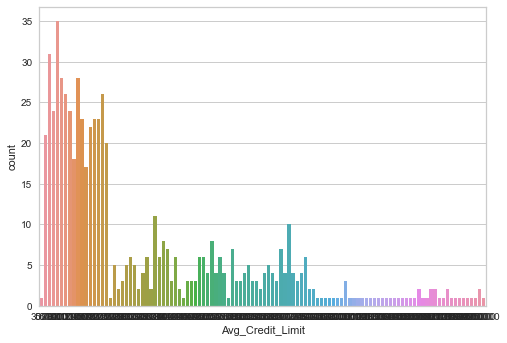

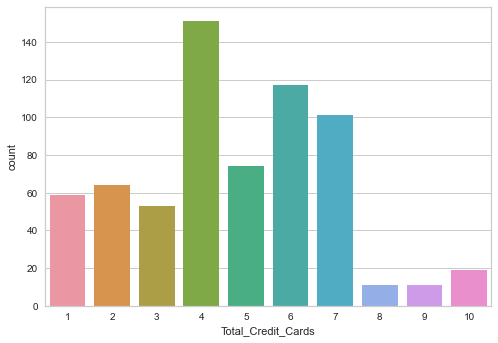

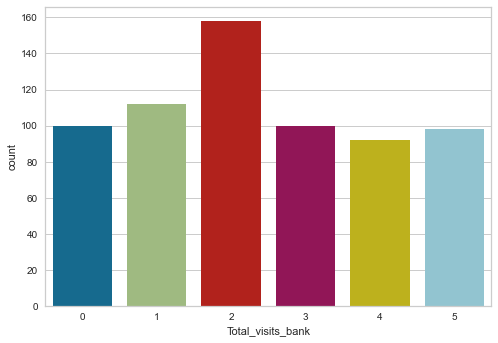

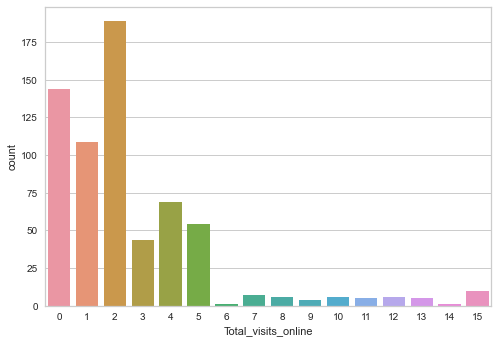

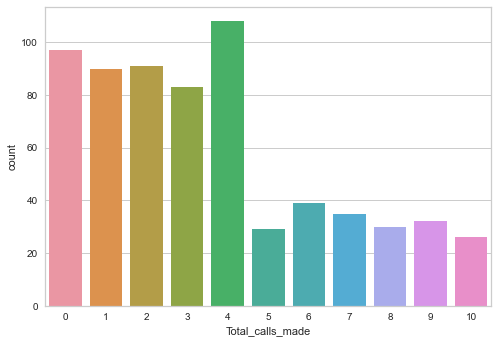

In [9]:
for i in ['Avg_Credit_Limit', 'Total_Credit_Cards','Total_visits_bank','Total_visits_online', 'Total_calls_made']:
      sns.countplot(df[i])
      plt.show()

**Observations**
- Most of the customers have an average credit limit of about $20,000.
- More than 140 customers have a total of 4 credit cards. About 120 and 100 customers have 6 and 7 credit cards, respectively. About 240 customers have 1, 2, 3 or 5 credit cards. A total of about 40 customers have 8 to 10 credit cards. We can conclude that the number of customers having 1, 2, 3 and 4 credit cards are about the same as those havind 4, 6 and 7 credit cards.
- Total visits bank data show that about 160 customers have 2 visits and the rest are almost evenly distributed from 0 to 5 visits.
- Majority of customers visits the bank online up to 5 times. The highest number of visits is 2.
- Most of the total calls made by the customers are between 0 and 4, 4 is the highest which is more than 100 customers. The rest of the customers' number of calls are in between 5 and 10 and almost evenly distributed.

**Boxplot analysis**

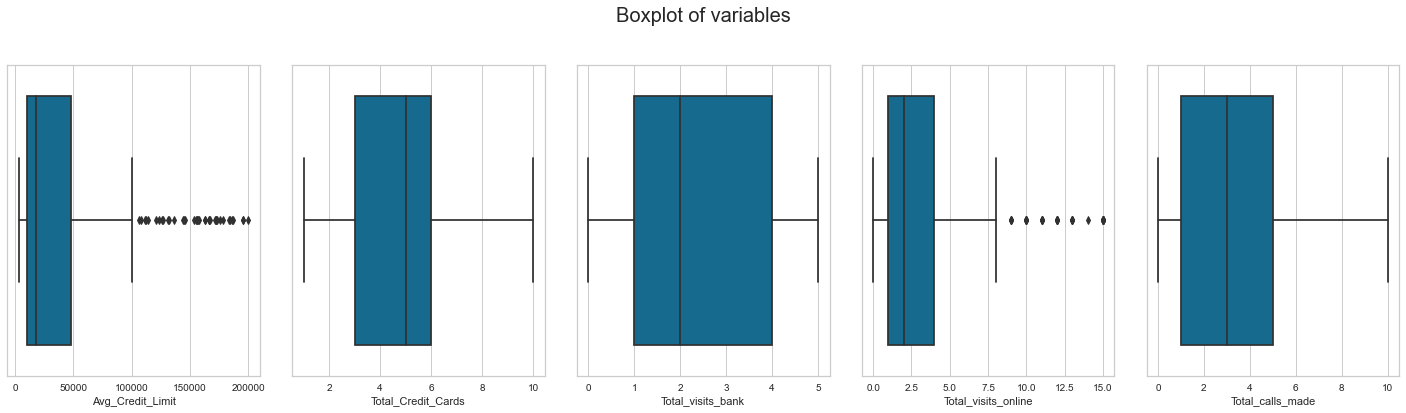

In [10]:
all_col = df.iloc[:,:].columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Boxplot of variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observations**

- There are many outliers in the average credit limit variable. 75% of customers have $50,000 or less credit limit. 
- There are no outliers in the total number of credit cards variable. 75% of customers have 6 or less credit cards.
- There are no outliers in the total number of bank visits variable. 75 % of customers visits the bank 4 times or less in total. 
- There are a few outliers in the total number of online visits variable. 75 % of customers visits the bank online 4 times or less in total, similar to regular visit percentile.
- There are no outliers in the total number of calls variable. 50% of customers make 1 to 5 calls. Median is 3.

### Bivariate Analysis

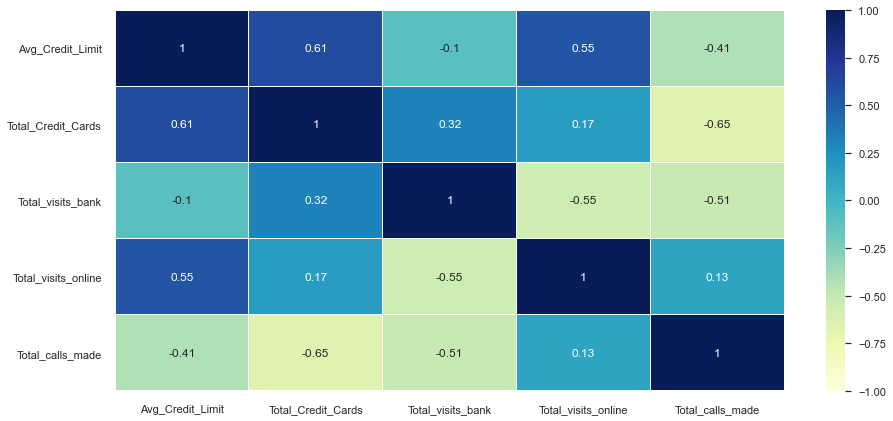

In [11]:
#Heatmap
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,
            cmap="YlGnBu")
plt.show()

**Observations**
- There appears no significant positive or negative correlation among the variables.
- There is only 61% positive correlation between total number of credit cards and average credit limit.
- It is interesting to observe that total number of credit cards do have a weak positive relationship with bank visits in person or online, but 65% negative correlation with total calls made. It means that customers with more credit cards do not prefer making calls.
- It is plausable to find that there is a negative relationship (-55%) between total number of bank visit and online visit. Customers visiting their banks do not use bank's online service.

### Pairplots

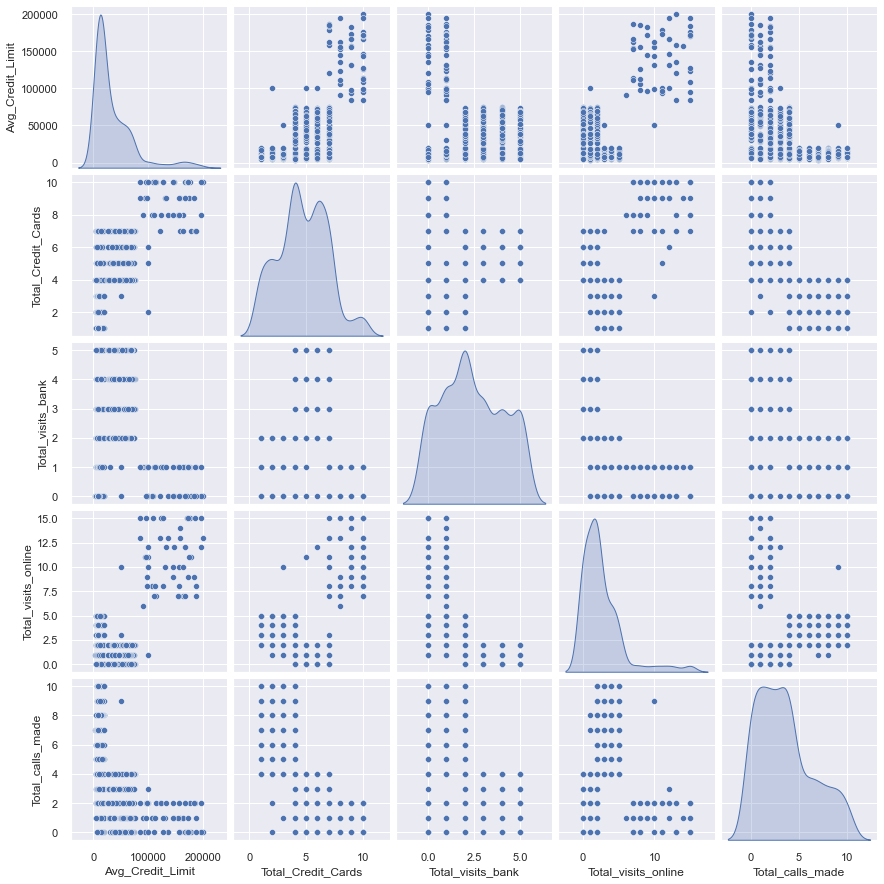

In [12]:
sns.pairplot(df[all_col],diag_kind="kde")

**Observations**
- Average credit limit is significantly skewed to the right, and seems to be bimodal.
- Total credit cards seems to have trimodal distribution.
- Total visits banks potentially have more than 2 peaks in its distribution.
- Total visits online is significantly skewed to the right. 
- Total calls made seems to be bimodal.

## K-Means Clustering

In [13]:
# Scaling the data set before clustering
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)  

In [14]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

In [15]:
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9429789712808515
Number of Clusters: 7 	Average Distortion: 0.9091004253829182
Number of Clusters: 8 	Average Distortion: 0.8904167350373801


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

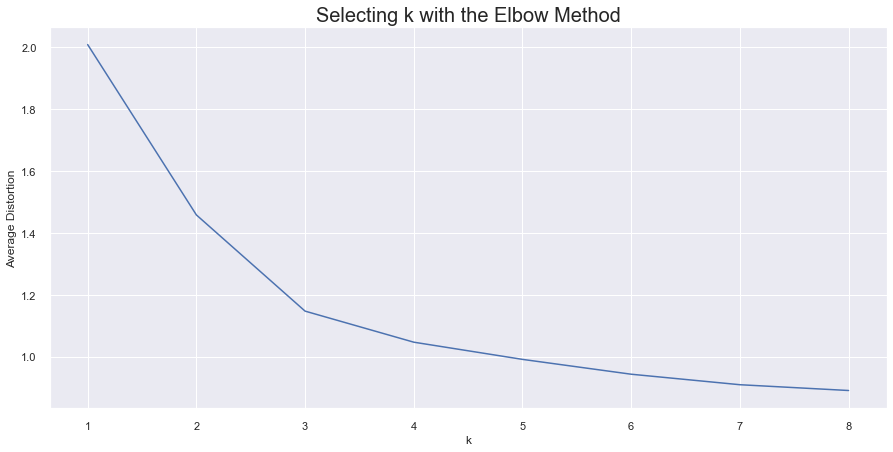

In [16]:
# Finding the average distortion distances and it against K (Elbow)
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)


The appropriate value of k from elbow curve seems to be 3 or 4 or 5. 

**Silhouette score calculation**

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.2717470361089752)
For n_clusters = 6, silhouette score is 0.25545029453623114)
For n_clusters = 7, silhouette score is 0.24788530259822936)
For n_clusters = 8, silhouette score is 0.22605246253035474)


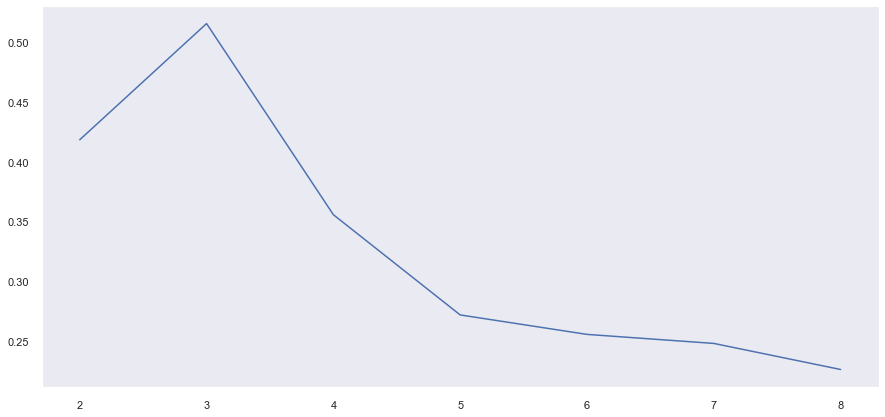

In [17]:
sil_score = []
cluster_list = list(range(2,9))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
plt.plot(cluster_list,sil_score)
plt.grid()

**Findings**
- The silhouette score for k=3 is the highest one but it is not enough for all the observations. Therefore, It must either 4 or 5. 
- Let's visualize the clusters below

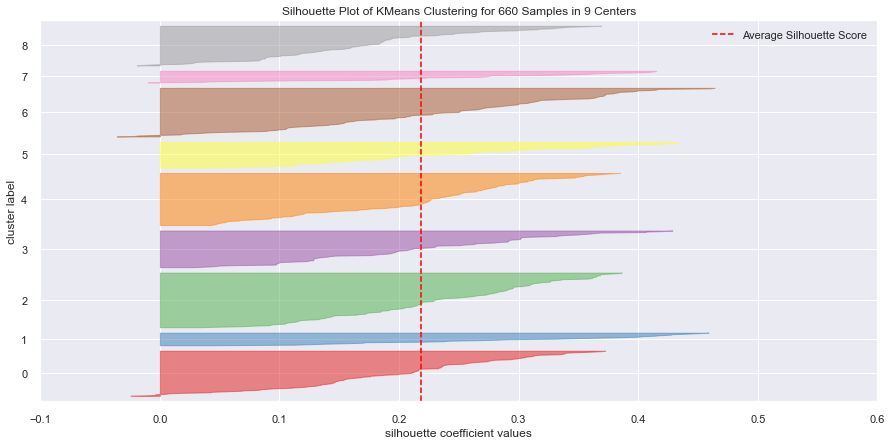

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

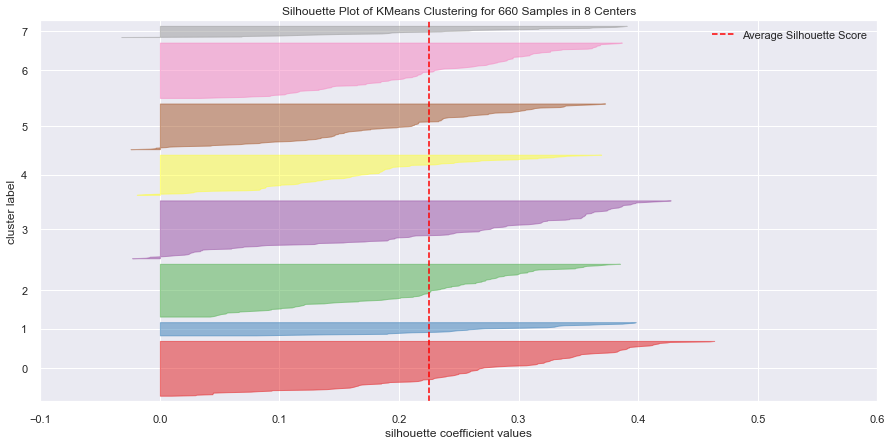

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

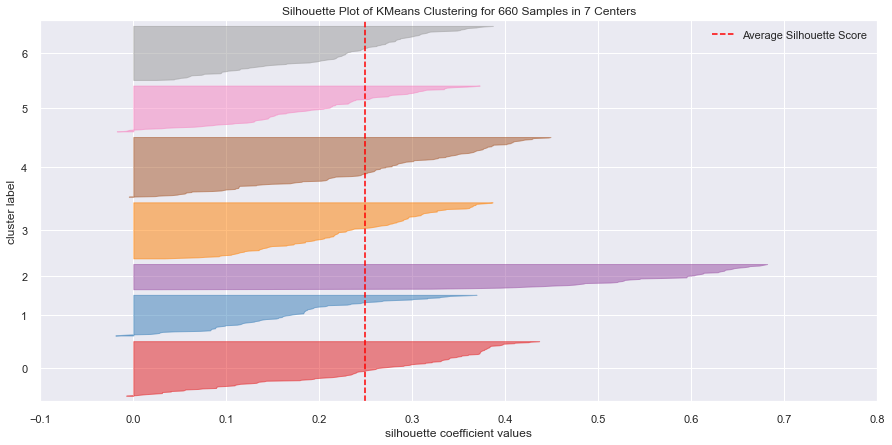

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

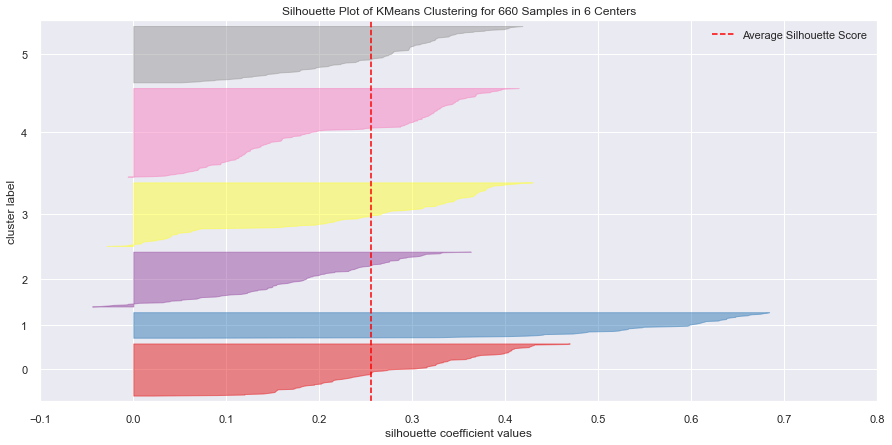

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

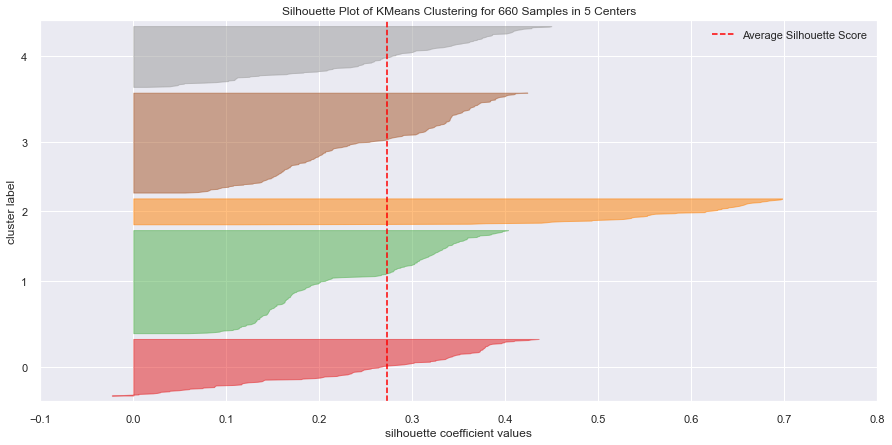

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

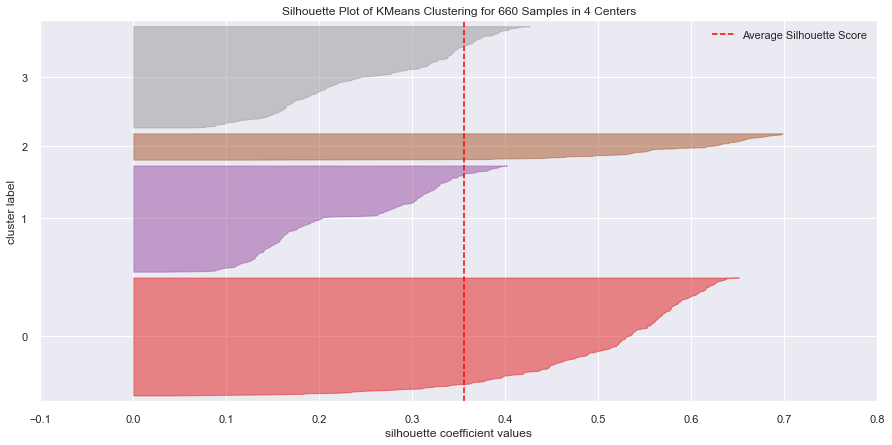

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

**Observations**
- Silhouette coefficient values for k equals 8,7, and 6 are high in each cluster but some clusters are every slim which means that they don't have many data points.
- Silhouette coefficient values for k equals 4 and 5 are similar in terms of representing the data points but average silhouette score for 4 cluster is much higher than that for 5 cluster.
- Therefore, I would select k = 4.

**Finding the segments and examining through Boxplot**

In [24]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [25]:
df['K_means_segments'] = kmeans.labels_

In [26]:
cluster_profile = df.groupby('K_means_segments').mean()

In [27]:
cluster_profile['count_in_each_segment'] = df.groupby('K_means_segments')['Total_visits_online'].count().values

In [28]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,31226.315789,5.478947,4.515789,1.010526,1.936842,190
1,12167.420814,2.393665,0.927602,3.574661,6.923077,221
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,35904.522613,5.522613,2.477387,0.969849,2.075377,199


**Boxplot Analysis**

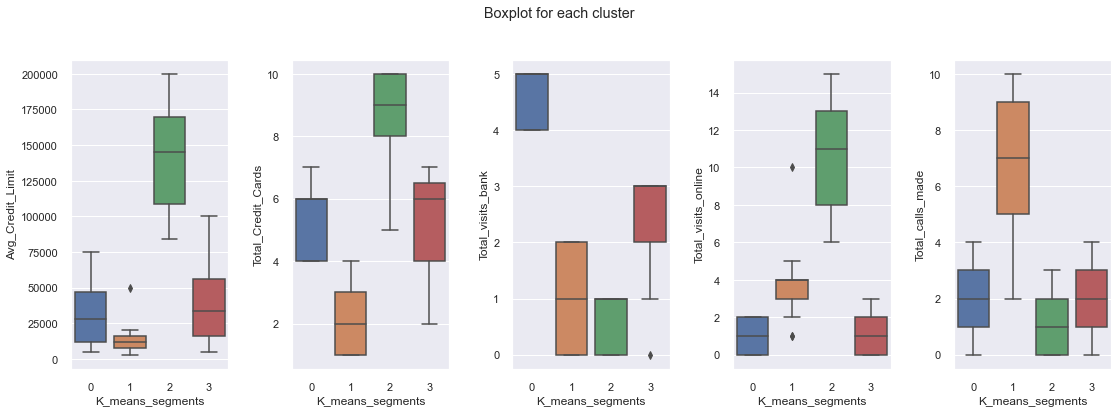

In [29]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Findings**
- Clusters 0 :
    - Average credit limit is low, up to $75,000.
    - Total credit cards is in between 4 and 7.
    - Total visits banks is in very high range between 4 and 5.
    - Total visits online is very low up to 2.
    - Total calls made is low between 0 and 4.
- Clusters 1 :
    - Average credit limit is very low.
    - Total credit cards is up to 4.
    - Total visits banks is low up to 2.
    - Total visits online is low ranging from 1 to 5.
    - Total calls made is of very wide range from 2 to 10.
- Clusters 2 :
    - Average credit limit is spread over from almost 80,000 to 200,000.
    - Total credit cards is high spreading over from 5 to 10.
    - Total visits banks is very low which is 0 or 1.
    - Total visits online is spreading over 6 to 15.
    - Total calls made is low between 0 and 3.
- Clusters 3 :
    - Average credit limit is spread up to 100,000.
    - Total credit cards is in the middle between 2 and 7.
    - Total visits banks is in the middle range up to 3.
    - Total visits online is is very low up to 3.
    - Total calls made is low between 0 and 4.
 

## Hierarchical Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering 

In [31]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [32]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

**Using Ward as linkage metric and distance as Eucledian**

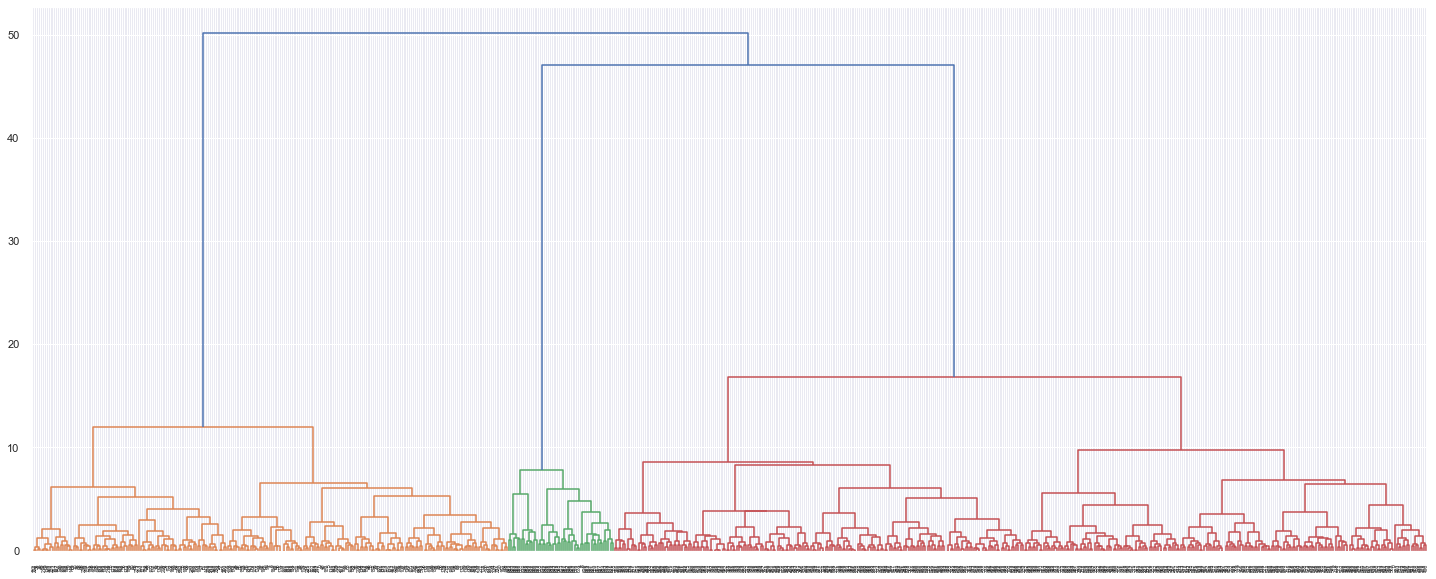

In [33]:
#generating the linkage matrix
Z = linkage(subset_scaled_df, 'ward', metric='euclidean') 

# plotting the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [34]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

# Calculating Cophenetic Correlation
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
print("Cophenetic Correlation = ", c)

Cophenetic Correlation =  0.7415156284827493


**Using Average as linkage metric and distance as Eucledian**

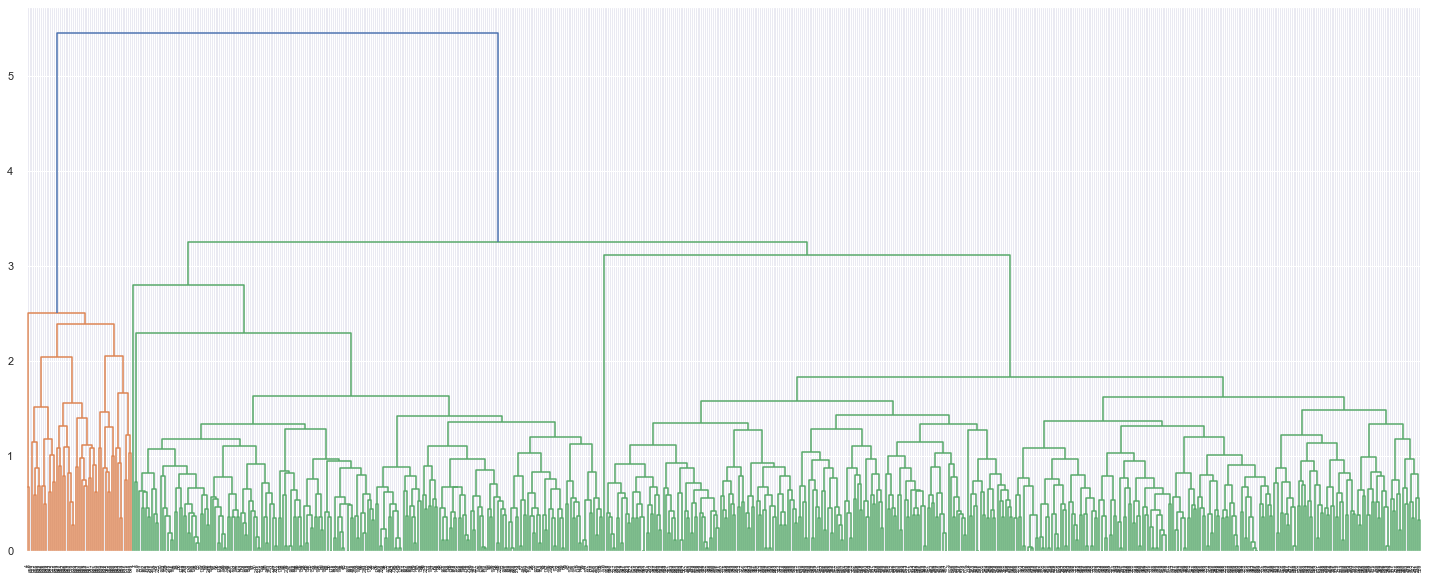

In [35]:
#generating the linkage matrix
Z = linkage(subset_scaled_df, 'average', metric='euclidean') 

# plotting the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [36]:
# Calculating Cophenetic Correlation
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
print("Cophenetic Correlation = ", c)

Cophenetic Correlation =  0.8977080867389372


**Using Complete as linkage metric and distance as Eucledian**

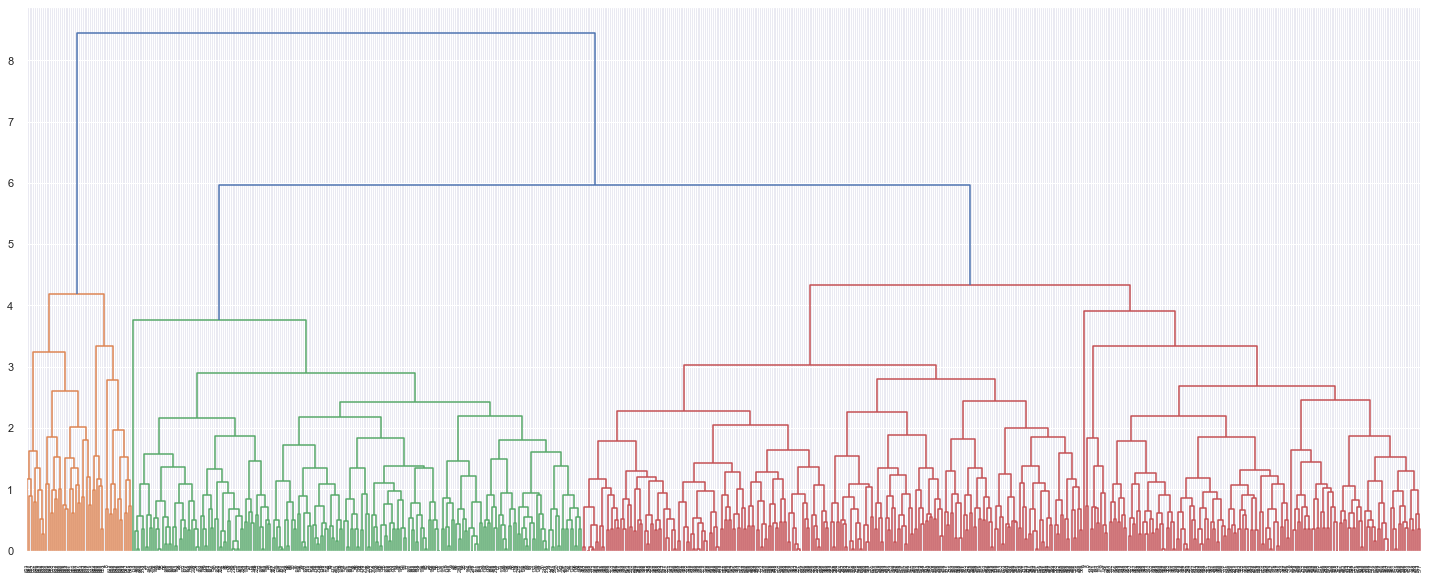

In [37]:
#generating the linkage matrix
Z = linkage(subset_scaled_df, 'complete', metric='euclidean') 

# plotting the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [38]:
# Calculating Cophenetic Correlation
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
print("Cophenetic Correlation = ", c)

Cophenetic Correlation =  0.8599730607972423


**Using Single as linkage metric and distance as Eucledian**

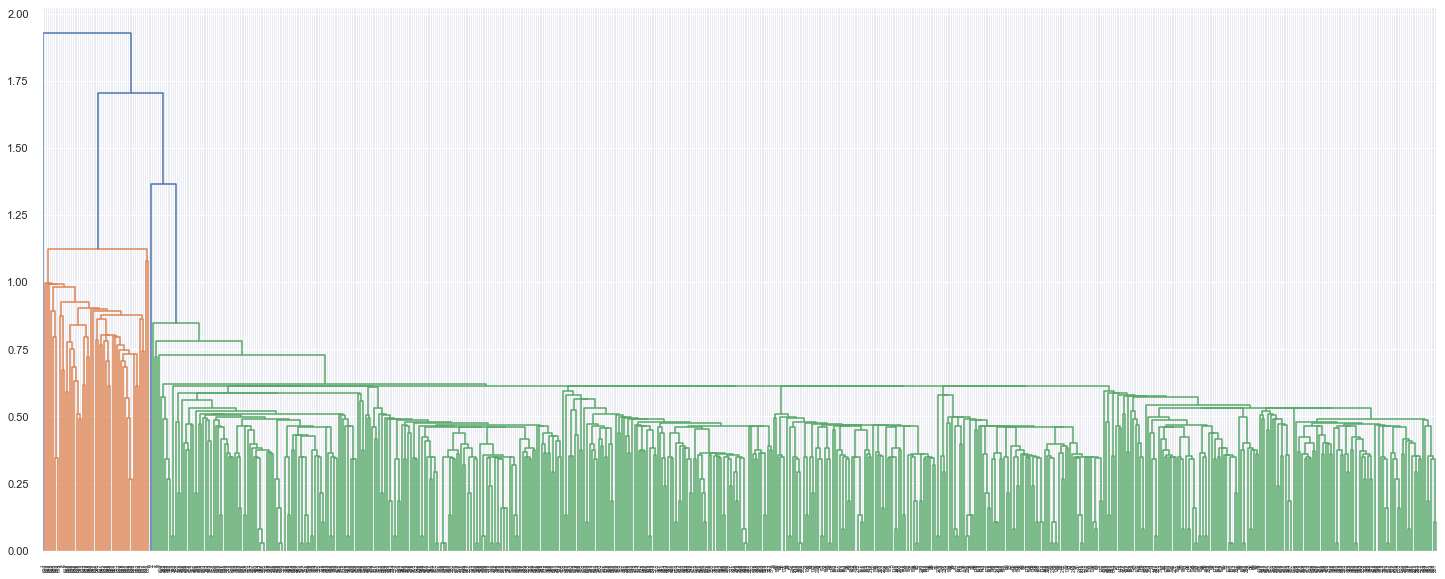

In [39]:
#generating the linkage matrix
Z = linkage(subset_scaled_df, 'single', metric='euclidean') 

# plotting the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [40]:
# Calculating Cophenetic Correlation
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
print("Cophenetic Correlation = ", c)

Cophenetic Correlation =  0.7391220243806552


**Observations**

- Based on the cophenetic coefficients, dendrogram with "average" method is best one fitting the data as its cophenetic correlation is about 0.90.
- The second best dendrogram belongs to the one with "complete" method.
- Ward method produces an appealing 4 clusters with holding reasonable data points compared to the other methods. 

**Analyzing clusters based on the Ward method** 

In [41]:
hierarchial_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')

In [42]:
hierarchial_model.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

In [43]:
df['Hierarchial segments'] = hierarchial_model.labels_

In [44]:
h_cluster_profile = df.groupby('Hierarchial segments').mean()

In [45]:
h_cluster_profile['count_in_each_segment'] = df.groupby('Hierarchial segments')['Total_Credit_Cards'].count().values

In [46]:
h_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segment
Hierarchial segments,,,,,,,
0,12151.111111,2.422222,0.937778,3.546667,6.857778,1.035556,225
1,38298.429319,5.670157,2.523560,0.947644,2.099476,2.890052,191
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
3,29474.226804,5.365979,4.448454,1.010309,1.891753,0.170103,194


**Silhouette score calculation**

In [47]:
sil_score = []
cluster_list = list(range(2,9))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.417704147620949)
For n_clusters = 3, silhouette score is 0.5147639589977819)
For n_clusters = 4, silhouette score is 0.3480822581261928)
For n_clusters = 5, silhouette score is 0.2569177732675831)
For n_clusters = 6, silhouette score is 0.22677849725544041)
For n_clusters = 7, silhouette score is 0.2162968685485734)
For n_clusters = 8, silhouette score is 0.2186949061936046)


**Findings**
- Silhouette score calculation in hierarchial clustering above is consistent with the scores we found in K-means clustering.
- The highest silhouette score (0.51) belongs to 3 cluster segments.
- The next highest score (0.35) indicates the number of clusters we selected which is 4.

**Boxplot Analysis**

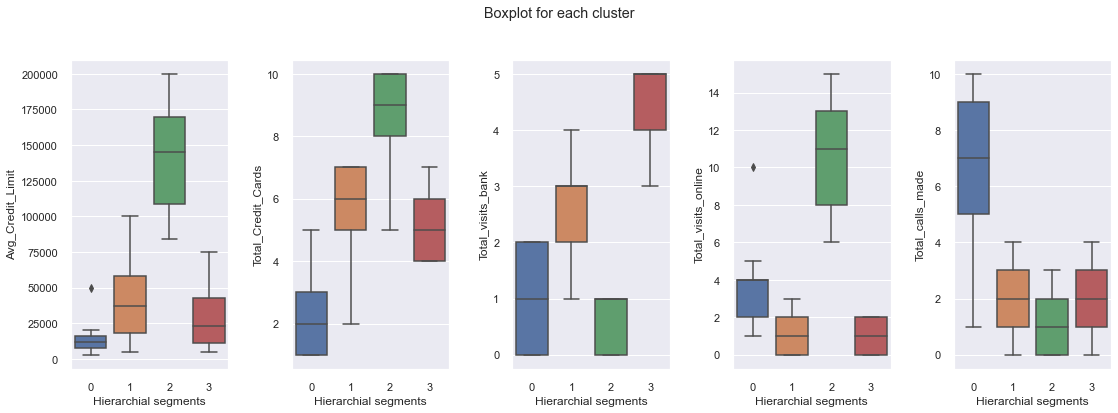

In [48]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['Hierarchial segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Findings**
- Clusters 0 :
    - Average credit limit is very low.
    - Total credit cards is low up to 5.
    - Total visits banks is low up to 2.
    - Total visits online is in the lower level between 1 and 5.
    - Total calls made is of very wide range from 1 to 10.
- Clusters 1 :
    - Average credit limit is in the bottom range, up to 100,000.
    - Total credit cards is in the middle range between 2 and 7.
    - Total visits banks is in the middle spreading over from 1 to 4.
    - Total visits online is in the low level ranging up to 3.
    - Total calls made is low between 0 and 4.
- Clusters 2 :
    - Average credit limit is in upper range between 80,000 and 200,000.
    - Total credit cards is high spreading over from 5 to 10.
    - Total visits banks is very low which is 0 or 1.
    - Total visits online is spreading over 6 to 15.
    - Total calls made is very low between 0 and 3.
- Clusters 3 :
    - Average credit limit is in the bottom range up to $75,000.
    - Total credit cards is in the middle between 4 and 7.
    - Total visits banks is in the high range between 3 and 5.
    - Total visits online is is very low up to 2.
    - Total calls made is low between 0 and 4.
 

## Clusters Comparison

- Cluster 0 - Hierarchical cluster has customers with low level features except the number of calls made to the bank.
K-means cluster does not have customer  with consisted features. 
- Cluster 1 - Hierarchical cluster has customers with mid level features except the number of calls to the bank which is low.
K-means cluster has customers similar to those in hierarchical cluster.
- Cluster 2 - Both hierarchical and K-means clusters focus on customers with high credit limit, more credit card and more online visitors, and also low fequent bank visitors and callers.
- Cluster 3 - Both hierarchical and K-means clusters focus on customers with low credit limit, middle range credit card and more bank visitors, and also low range online visitors and callers. Differences in ranges is more obvious in the hierarchical cluster.


## Analysis the Clusters formed

**The following analysis is based on the hierarchical clusters**

- Clustor 0 includes the customers with low credit limit and less number of credit cards. It is a plausable placement because there is a positive relationship between these two features. And these customers mostly query the bank by calling. Other contact venus doesn't seem to be important compared to the calls made.
- However, clustor 2, in contrast to clustor 0, has customers with high credit limit and more number of credit card which is also a plausable placement. These customers can be reached through online because the clustor includes those who contact the banking services online more frequently.
- Clustor 1 has a wide range of customers with credit limit and the number of credit card to the certain point, but those customers are mostly coming to the bank to get service compared to online visitors and those who prefers to call in. So this clustor seems to represent an average customer. They are mostly visiting bank and they have enough credit cards with limits in them.
- Customer 3 represents the customers with low credit limit, average number of credit cards but the most frequently bank visiting customers. Customer having lower range of credit limit with relatively higher number of credit cards can be reached out easily when they visit the bank.